<a href="https://colab.research.google.com/gist/tsumarios/d3947e4d7731e3f7aade63f1f30e059a/ai4cysec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AI4CySec

This Jupyter notebook provides an interactive exploration into the classification of anti-forensics techniques versus legitimate privacy practices using synthetic data.
The primary goal of this notebook is to provide a practical demonstration of how machine learning techniques can be applied to distinguish between anti-forensics techniques and legitimate privacy practices.

This notebook includes various classification algorithms such as K-Nearest Neighbors, Naive Bayes, Logistic Regression, Support Vector Machines, Random Forest, XGBoost, and Neural Networks.
Futhermore, it also provides an introduction to Adversarial Machine Learning with an example based on Fast Gradient Sign Method.

### Other AI Applications for CySec

While the following applications are not covered in this notebook, it is noteworthy to mention them for a future expansion of the notebook:

**Anomaly Detection**: Anomaly detection is a crucial aspect of cybersecurity, where AI techniques can be employed to identify unusual patterns or behaviors in network traffic, system logs, or user activities. This section can explore techniques such as Isolation Forest, One-Class SVM, or Autoencoders for anomaly detection.

**Malware Detection**: AI-based malware detection involves training models to recognise patterns indicative of malicious software. This section can showcase approaches like Convolutional Neural Networks (CNNs) or Recurrent Neural Networks (RNNs) for classifying malware samples based on their code or behavior.

**Intrusion Detection Systems (IDS)**: IDS are used to monitor network traffic and detect suspicious activities or attacks. AI techniques like deep learning can enhance the detection capabilities of IDS by automatically learning and adapting to new threats. This section can cover the implementation of deep learning models for network intrusion detection.

**Threat Intelligence**: AI can be utilised to analyse large volumes of threat intelligence data, including indicators of compromise (IOCs) and malware signatures, to identify emerging threats and prioritise response efforts. This section can demonstrate how Large Language Models (LLMs), such as GPT (Generative Pre-trained Transformer), and natural language processing (NLP) techniques can be applied to extract actionable insights from unstructured threat data.

**Adversarial Robustness Testing**: Building on the adversarial machine learning section, this section can delve deeper into evaluating the robustness of AI-based cybersecurity systems against sophisticated adversarial attacks. It can explore advanced attack strategies and defense mechanisms, such as adversarial training and defensive distillation.

**Privacy-Preserving AI**: Given the sensitive nature of cybersecurity data, ensuring privacy is paramount. Techniques such as federated learning, homomorphic encryption, and differential privacy can be discussed in this section to illustrate how AI models can be trained on distributed data sources while preserving the privacy of individual contributors.

**Cyber Threat Hunting**: AI-powered threat hunting involves proactively searching for indicators of compromise and potential security breaches within an organisation's network. This section can introduce techniques like supervised learning for building predictive models to aid threat hunting activities.

**Security Operations Automation**: AI can automate routine security tasks, such as log analysis, incident response, and vulnerability management. This section can showcase the deployment of AI-driven security orchestration, automation, and response (SOAR) platforms to streamline security operations and improve incident response times.

## Best Practices in Data Preprocessing for Machine Learning

### 1. Understanding and Cleaning Data
- **Identify and handle missing values**: Depending on the context, options include filling missing values with the mean, median, mode, using prediction models, or dropping rows or columns with too many missing values.
- **Remove duplicates**: Duplicates can skew data and lead to overfitting. Identify and remove any duplicate records.
- **Outlier detection and handling**: Manage outliers by removing them, capping them, or using methods robust against outliers.

### 2. Data Transformation
- **Scaling and normalisation**: Use Min-Max scaling, Standard scaling (Z-score normalisation), or robust scaling to ensure features are on a similar scale.
- **Encoding categorical data**: Convert categorical data to numerical formats using one-hot encoding, label encoding, or embedding layers for deep learning.
- **Data discretisation**: Convert continuous variables into categorical variables to potentially improve model performance.

### 3. Feature Engineering
- **Creating new features**: Develop new, potentially more relevant features from existing data using domain knowledge.
- **Dimensionality reduction**: Apply PCA (Principal Component Analysis), t-SNE, or LDA (Linear Discriminant Analysis) to reduce the number of features, helping to alleviate issues from the curse of dimensionality and improving model interpretability.

### 4. Data Splitting
- **Split data into training, validation, and test sets**: Typically, data is split into a 70-15-15 or 60-20-20 percentage ratio to avoid overfitting and ensure the model generalises well.
- **Stratified sampling**: Ensure each data split represents the overall distribution of the data, especially important in cases of imbalanced classes.

### 5. Handling Imbalanced Data
- **Resampling techniques**: Balance the data by over-sampling the minority class or under-sampling the majority class.
- **Synthetic data generation**: Use techniques like SMOTE (Synthetic Minority Over-sampling Technique) to generate synthetic samples.

### 6. Text and Image Data
- **Text data preprocessing**: Apply tokenisation, stemming, lemmatisation, and removal of stop words.
- **Image data preprocessing**: Techniques include resizing, normalisation, data augmentation (such as rotations, translation, flipping), and colour space transformations.

### 7. Automation and Reproducibility
- **Pipeline creation**: Automate and ensure the reproducibility of preprocessing steps using pipelines in libraries like Scikit-learn.
- **Documentation and version control**: Keep track of preprocessing decisions and versions to ensure models can be retrained and validated in the future.

---

#### Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler

## Dataset Generation

We generate a synthetic dataset representing features related to anti-forensics techniques and legitimate privacy practices.

The dataset consists of three features and a label indicating whether each instance belongs to the anti-forensics (1) or legitimate privacy (0) class.

In [2]:
# Generate synthetic anti-forensics vs legitimate privacy data
def generate_antiforensics_vs_privacy_data(n_samples):

    """
    NOTE: In alternative, we can use the make_classification method

    X, y = make_classification(n_samples=n_samples, n_features=3, n_informative=3, n_redundant=0,
                              n_classes=2, weights=(0.5, 0.5), flip_y=0.01, class_sep=1.0, random_state=None)
    return X, y
    """

    # Generating features for anti-forensics
    anti_forensics_features = np.random.uniform(low=0, high=10, size=(n_samples // 2, 3))

    # Generating features for legitimate privacy
    privacy_features = np.random.uniform(low=5, high=15, size=(n_samples // 2, 3))

    # Create labels: 1 for anti-forensics, 0 for legitimate privacy
    anti_forensics_labels = np.ones((n_samples // 2, 1), dtype=int)
    privacy_labels = np.zeros((n_samples // 2, 1), dtype=int)

    # Combine features and labels
    anti_forensics_data = np.concatenate((anti_forensics_features, anti_forensics_labels), axis=1)
    privacy_data = np.concatenate((privacy_features, privacy_labels), axis=1)

    # Concatenate anti-forensics and privacy data
    combined_data = np.concatenate((anti_forensics_data, privacy_data), axis=0)

    # Shuffle the data
    np.random.shuffle(combined_data)

    return combined_data


# Create a dataset with 1000 instances
n_samples = 1000
dataset = generate_antiforensics_vs_privacy_data(n_samples)

# Convert dataset to DataFrame
columns = ['feature1', 'feature2', 'feature3', 'label']
df = pd.DataFrame(dataset, columns=columns)
df.head()

,feature1,feature2,feature3,label
0,9.393722,12.826438,7.554773,0.0
1,3.784837,1.209674,2.772990,1.0
2,9.746757,7.334925,4.328217,1.0
3,3.989278,2.902291,0.771035,1.0
4,14.102634,5.500518,14.475902,0.0


### Split dataset into train, valid, test

We split the synthetic dataset into training, validation, and test sets.

The features are scaled using standard scaling techniques, and optionally, the training data is oversampled to address any class imbalance issues.

In [3]:
def scale_dataset(dataframe, oversample=False):
  # Separate features and labels
  X = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  # Scale data
  scaler = StandardScaler()
  X = scaler.fit_transform(X)

  # Resample data
  if oversample:
    X, y = RandomOverSampler().fit_resample(X, y)

  data = np.hstack((X, np.reshape(y, (-1, 1))))

  return data, X, y


train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])  # train 60%, valid 20%, test 20%
# Scale dataset
train, X_train, y_train = scale_dataset(train, oversample=True)
valid, X_valid, y_valid = scale_dataset(valid, oversample=False)
test, X_test, y_test = scale_dataset(test, oversample=False)

## AI Models

In this section, several machine learning models such as K-Nearest Neighbors, Naive Bayes, Logistic Regression, Support Vector Machines, Random Forest, XGBoost, and a Neural Network are trained on the preprocessed training data.

Each model is evaluated using classification metrics like precision, recall, and F1-score on the test set to assess its performance.

### KNN

In [4]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [5]:
y_pred = knn_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.94      0.89      0.91       102
         1.0       0.89      0.94      0.92        98

    accuracy                           0.92       200
   macro avg       0.92      0.92      0.91       200
weighted avg       0.92      0.92      0.91       200



### Naive Bayes

In [6]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model = nb_model.fit(X_train, y_train)

In [7]:
y_pred = nb_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.91      0.91      0.91       102
         1.0       0.91      0.91      0.91        98

    accuracy                           0.91       200
   macro avg       0.91      0.91      0.91       200
weighted avg       0.91      0.91      0.91       200



### Logistic Regression

In [8]:
from sklearn.linear_model import LogisticRegression

lg_model = LogisticRegression()
lg_model = lg_model.fit(X_train, y_train)

In [9]:
y_pred = lg_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.93      0.91      0.92       102
         1.0       0.91      0.93      0.92        98

    accuracy                           0.92       200
   macro avg       0.92      0.92      0.92       200
weighted avg       0.92      0.92      0.92       200



### SVM

In [10]:
from sklearn.svm import SVC

svm_model = SVC()
svm_model = svm_model.fit(X_train, y_train)

In [11]:
y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.92      0.91      0.92       102
         1.0       0.91      0.92      0.91        98

    accuracy                           0.92       200
   macro avg       0.91      0.92      0.91       200
weighted avg       0.92      0.92      0.92       200



### Random Forest

In [12]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [13]:
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.90      0.91      0.91       102
         1.0       0.91      0.90      0.90        98

    accuracy                           0.91       200
   macro avg       0.91      0.90      0.90       200
weighted avg       0.91      0.91      0.90       200



### XGBoost

In [14]:
from xgboost import XGBClassifier

XGB_model_instance = XGBClassifier()
XGB_model_instance.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [15]:
y_pred = XGB_model_instance.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.88      0.93      0.90       102
         1.0       0.92      0.87      0.89        98

    accuracy                           0.90       200
   macro avg       0.90      0.90      0.90       200
weighted avg       0.90      0.90      0.90       200



### Neural Network

The neural network model is further refined by tuning hyperparameters such as the number of nodes, dropout probability, learning rate, and batch size. This fine-tuning process aims to optimise the neural network's performance on the classification task.

In [16]:
def plot_history(history):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
  ax1.plot(history.history['loss'], label='loss')
  ax1.plot(history.history['val_loss'], label='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary Cross Entropy')
  ax1.grid(True)

  ax2.plot(history.history['accuracy'], label='accuracy')
  ax2.plot(history.history['val_accuracy'], label='val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.grid(True)

  plt.show()

16 nodes, dropout 0, learning rate 0.01, batch size 32


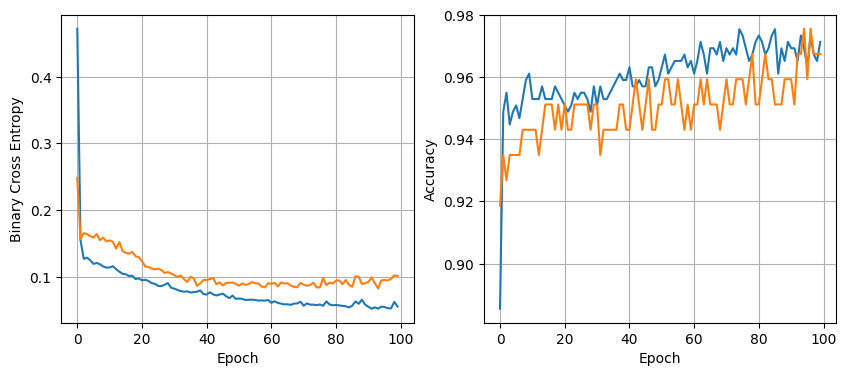

7/7 [==============================] - 0s 5ms/step - loss: 0.1610 - accuracy: 0.9450
16 nodes, dropout 0, learning rate 0.01, batch size 64


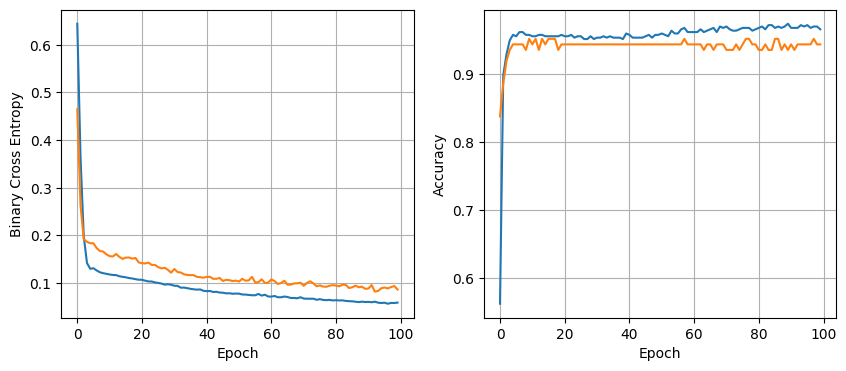

7/7 [==============================] - 0s 3ms/step - loss: 0.1374 - accuracy: 0.9350
16 nodes, dropout 0, learning rate 0.01, batch size 128


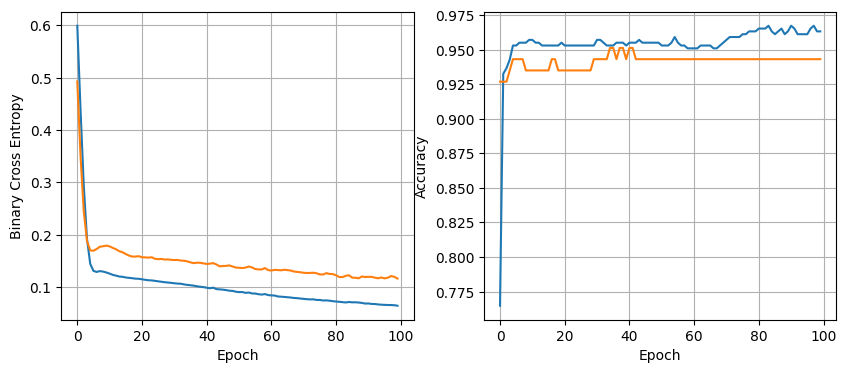

7/7 [==============================] - 0s 3ms/step - loss: 0.1082 - accuracy: 0.9450
16 nodes, dropout 0, learning rate 0.005, batch size 32


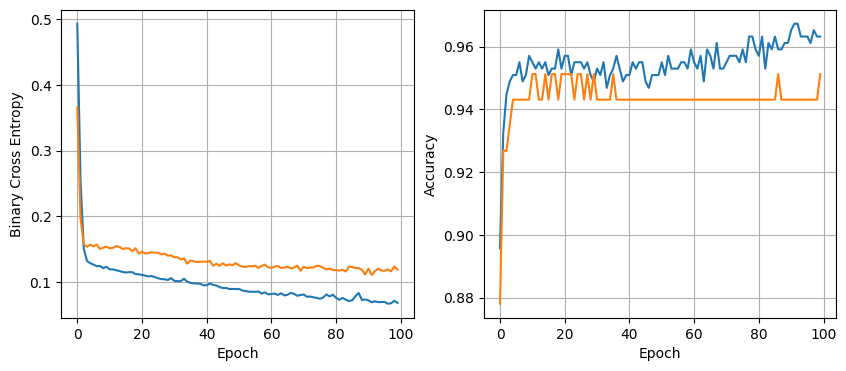

7/7 [==============================] - 0s 4ms/step - loss: 0.1353 - accuracy: 0.9350
16 nodes, dropout 0, learning rate 0.005, batch size 64


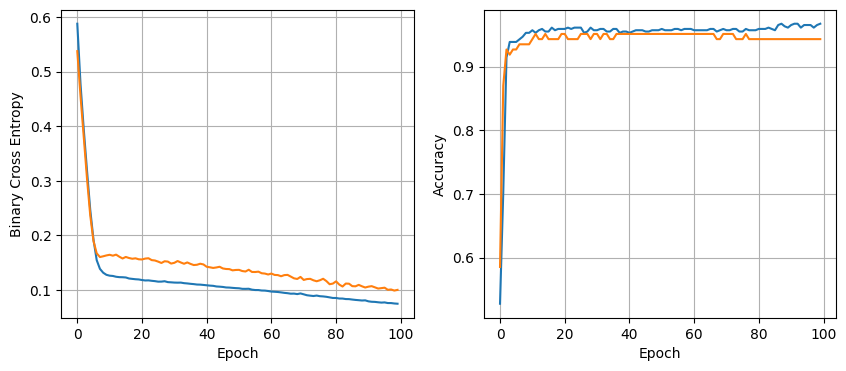

7/7 [==============================] - 0s 3ms/step - loss: 0.1036 - accuracy: 0.9450
16 nodes, dropout 0, learning rate 0.005, batch size 128


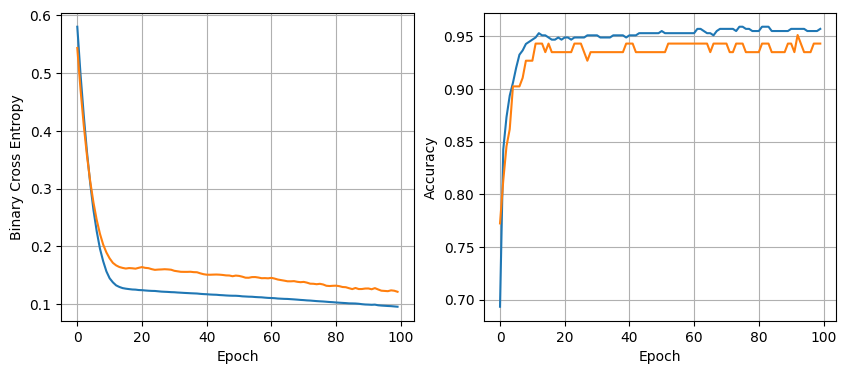

7/7 [==============================] - 0s 3ms/step - loss: 0.1204 - accuracy: 0.9550
16 nodes, dropout 0, learning rate 0.001, batch size 32


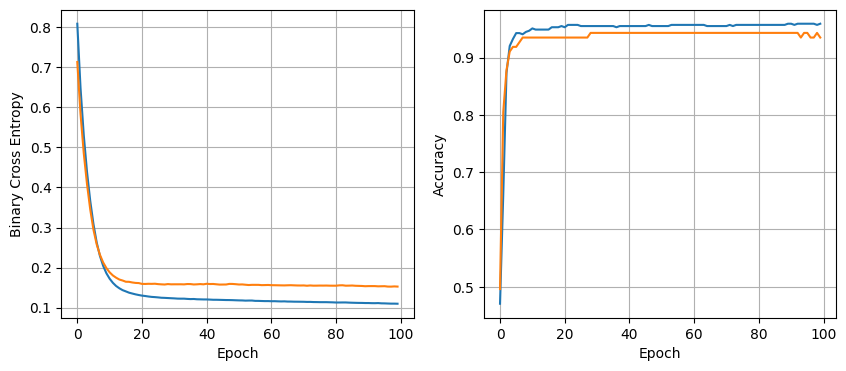

7/7 [==============================] - 0s 3ms/step - loss: 0.1429 - accuracy: 0.9350
16 nodes, dropout 0, learning rate 0.001, batch size 64


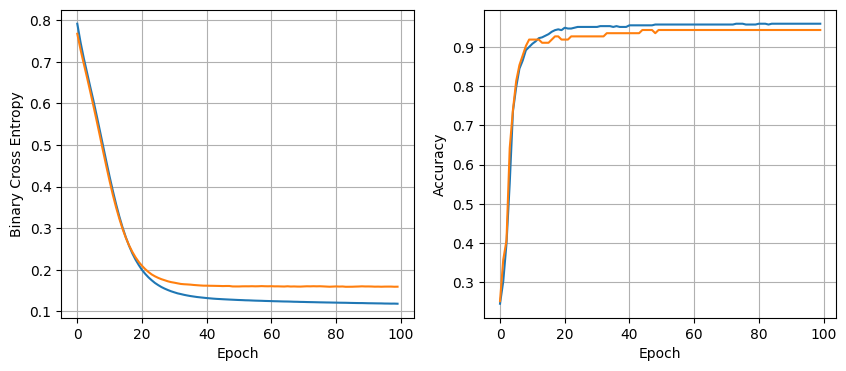

7/7 [==============================] - 0s 3ms/step - loss: 0.1401 - accuracy: 0.9350
16 nodes, dropout 0, learning rate 0.001, batch size 128


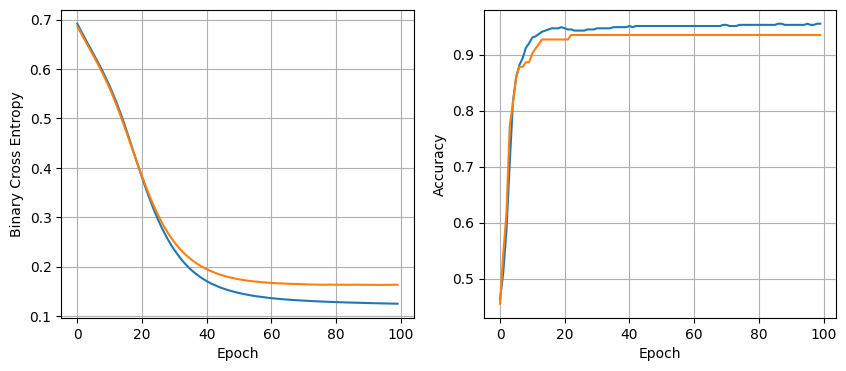

7/7 [==============================] - 0s 3ms/step - loss: 0.1403 - accuracy: 0.9450
16 nodes, dropout 0.2, learning rate 0.01, batch size 32


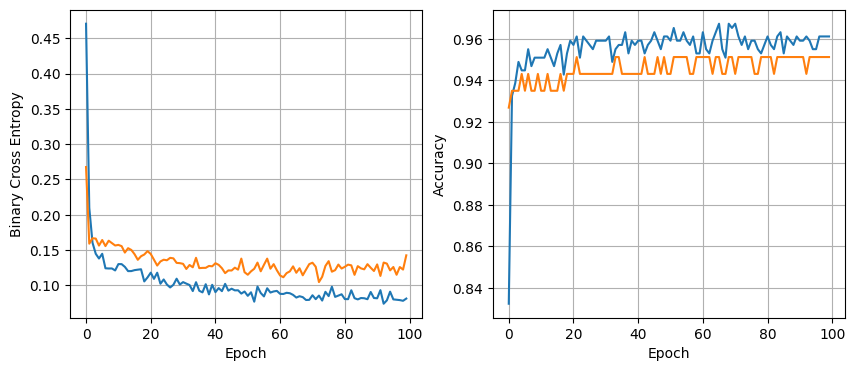

7/7 [==============================] - 0s 3ms/step - loss: 0.1071 - accuracy: 0.9500
16 nodes, dropout 0.2, learning rate 0.01, batch size 64


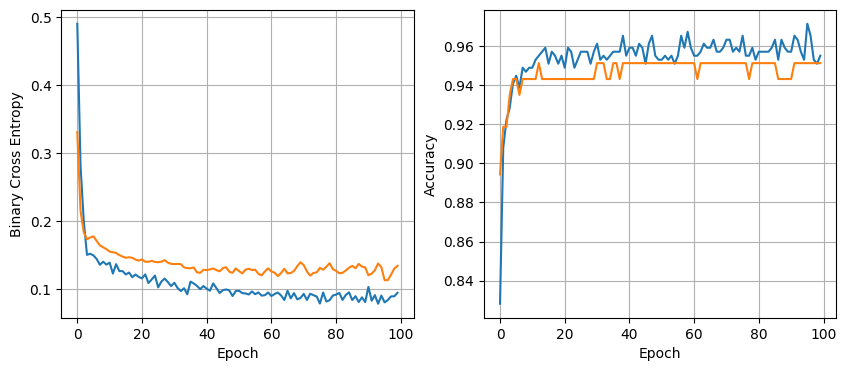

7/7 [==============================] - 0s 3ms/step - loss: 0.1082 - accuracy: 0.9650
16 nodes, dropout 0.2, learning rate 0.01, batch size 128


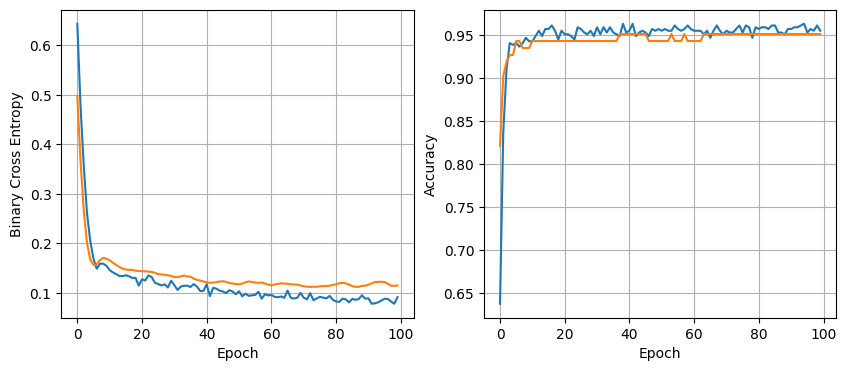

7/7 [==============================] - 0s 3ms/step - loss: 0.1211 - accuracy: 0.9450
16 nodes, dropout 0.2, learning rate 0.005, batch size 32


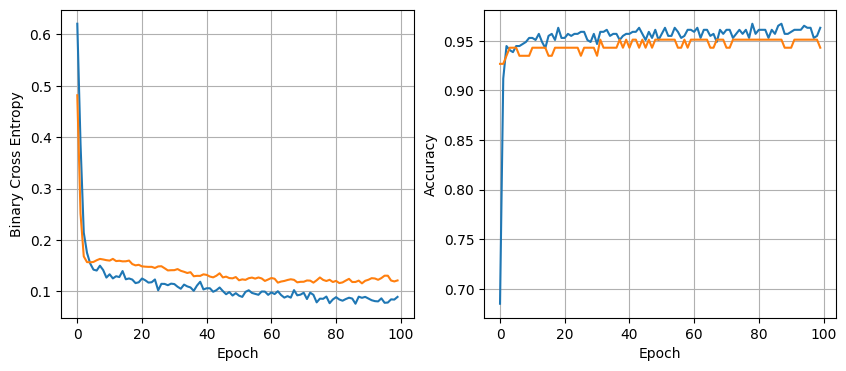

7/7 [==============================] - 0s 3ms/step - loss: 0.1207 - accuracy: 0.9450
16 nodes, dropout 0.2, learning rate 0.005, batch size 64


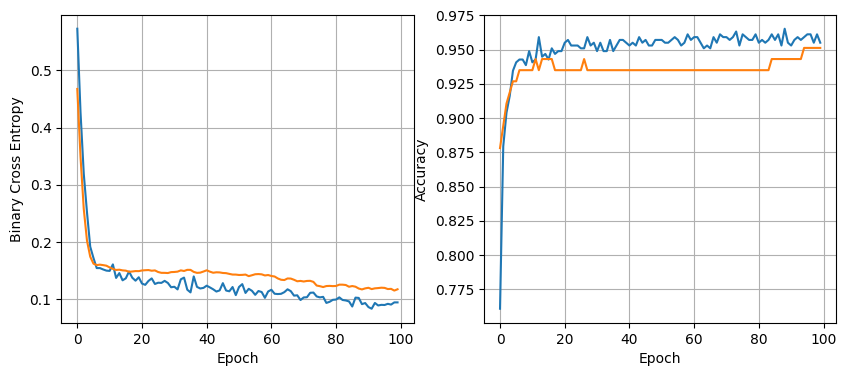

7/7 [==============================] - 0s 4ms/step - loss: 0.1310 - accuracy: 0.9400
16 nodes, dropout 0.2, learning rate 0.005, batch size 128


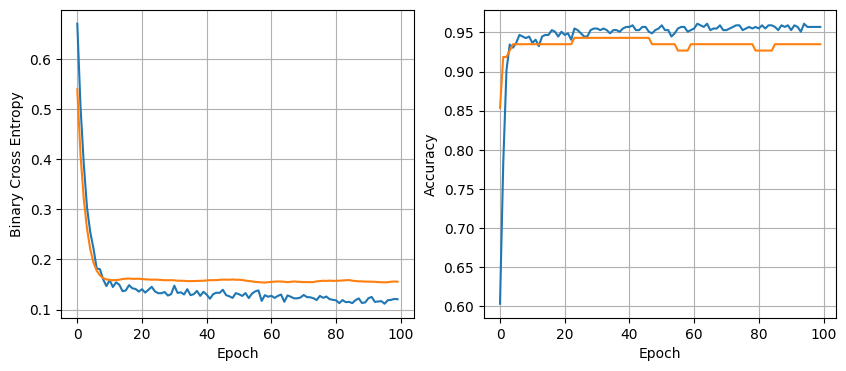

7/7 [==============================] - 0s 3ms/step - loss: 0.1456 - accuracy: 0.9350
16 nodes, dropout 0.2, learning rate 0.001, batch size 32


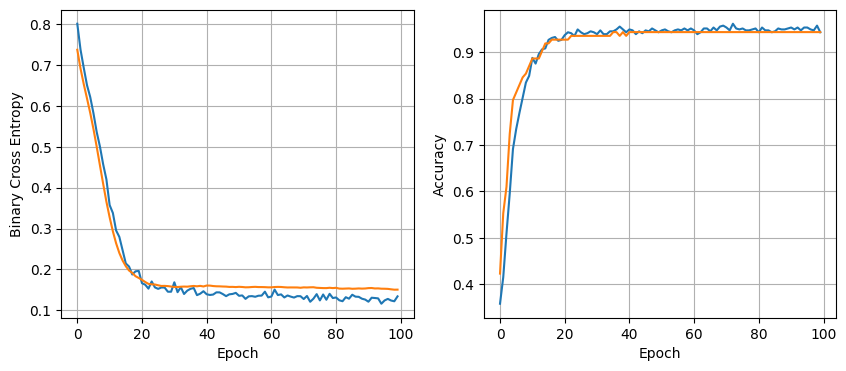

7/7 [==============================] - 0s 2ms/step - loss: 0.1488 - accuracy: 0.9350
16 nodes, dropout 0.2, learning rate 0.001, batch size 64


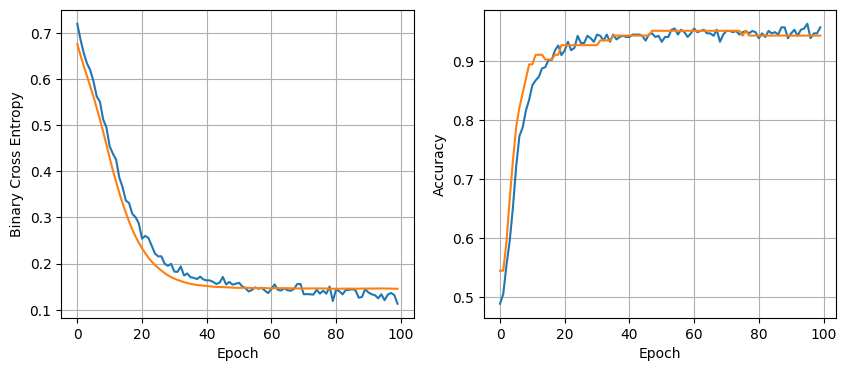

7/7 [==============================] - 0s 10ms/step - loss: 0.1361 - accuracy: 0.9400
16 nodes, dropout 0.2, learning rate 0.001, batch size 128


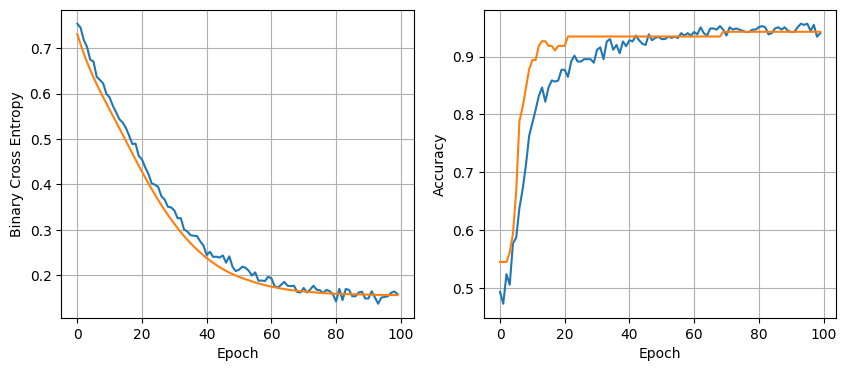

7/7 [==============================] - 0s 6ms/step - loss: 0.1449 - accuracy: 0.9350
32 nodes, dropout 0, learning rate 0.01, batch size 32


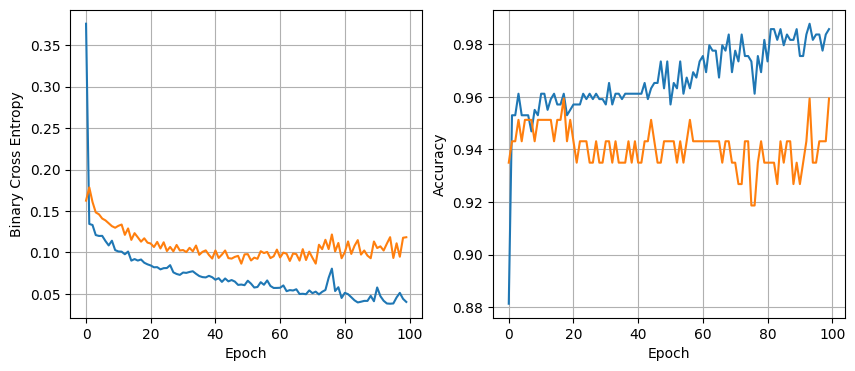

7/7 [==============================] - 0s 6ms/step - loss: 0.1832 - accuracy: 0.9450
32 nodes, dropout 0, learning rate 0.01, batch size 64


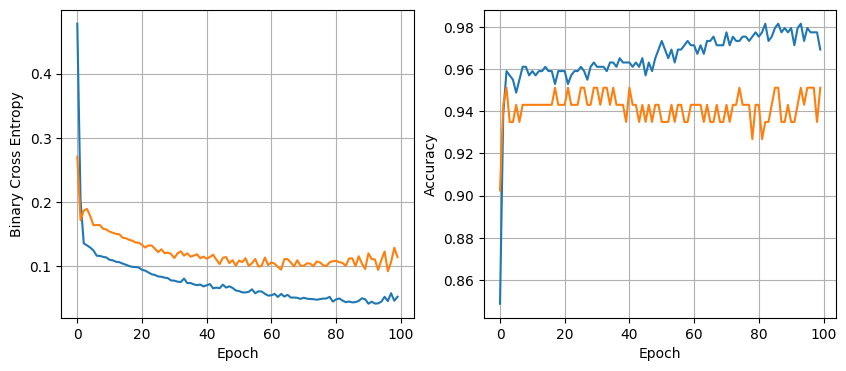

7/7 [==============================] - 0s 4ms/step - loss: 0.1700 - accuracy: 0.9400
32 nodes, dropout 0, learning rate 0.01, batch size 128


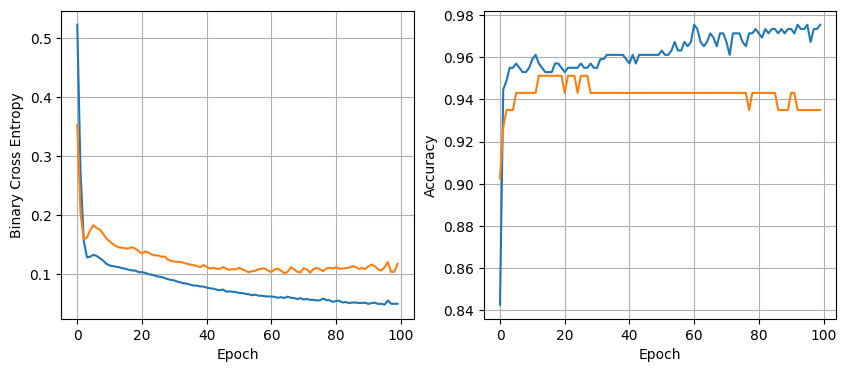

7/7 [==============================] - 0s 3ms/step - loss: 0.1258 - accuracy: 0.9450
32 nodes, dropout 0, learning rate 0.005, batch size 32


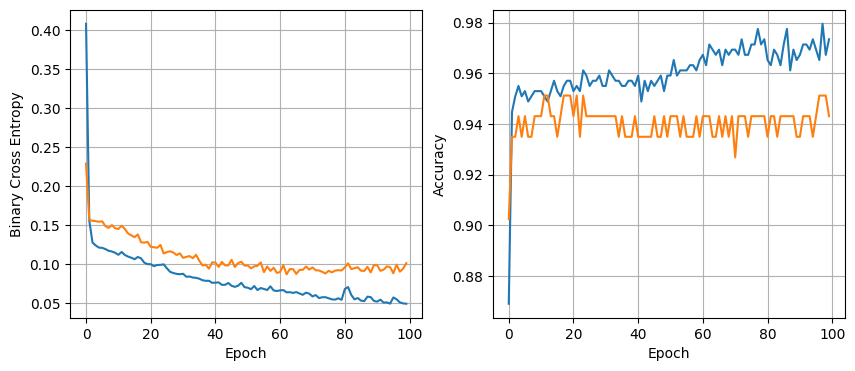

7/7 [==============================] - 0s 6ms/step - loss: 0.1580 - accuracy: 0.9500
32 nodes, dropout 0, learning rate 0.005, batch size 64


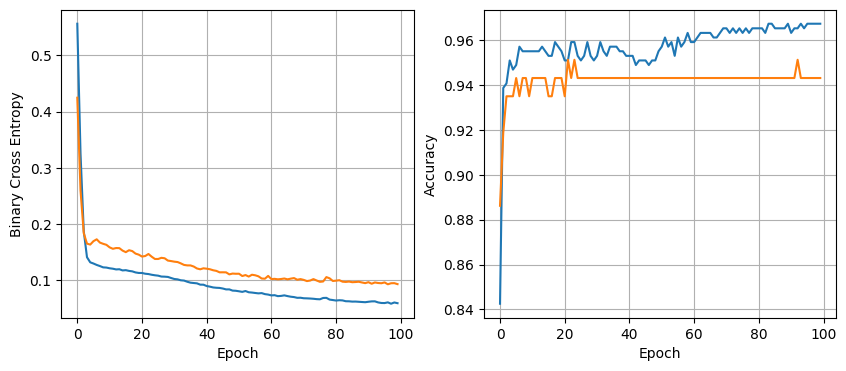

7/7 [==============================] - 0s 3ms/step - loss: 0.1213 - accuracy: 0.9500
32 nodes, dropout 0, learning rate 0.005, batch size 128


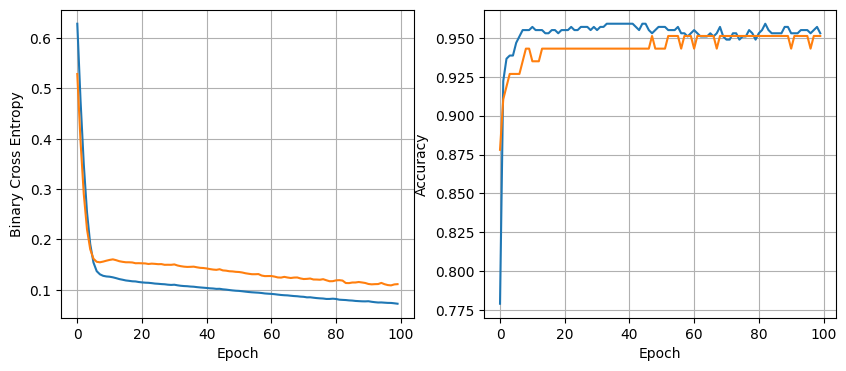

7/7 [==============================] - 0s 3ms/step - loss: 0.1087 - accuracy: 0.9500
32 nodes, dropout 0, learning rate 0.001, batch size 32


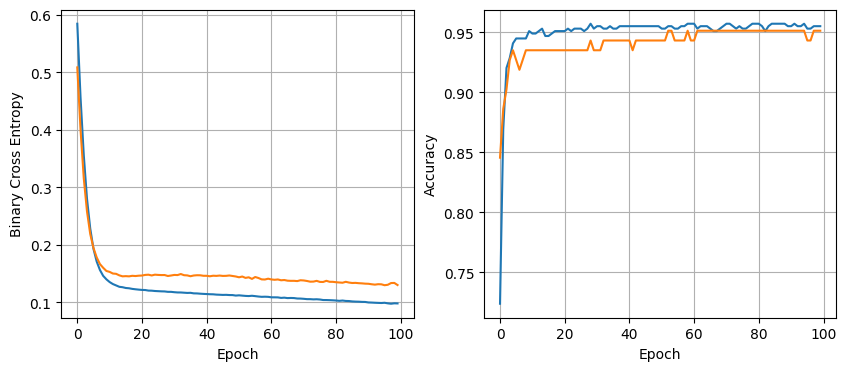

7/7 [==============================] - 0s 3ms/step - loss: 0.1315 - accuracy: 0.9450
32 nodes, dropout 0, learning rate 0.001, batch size 64


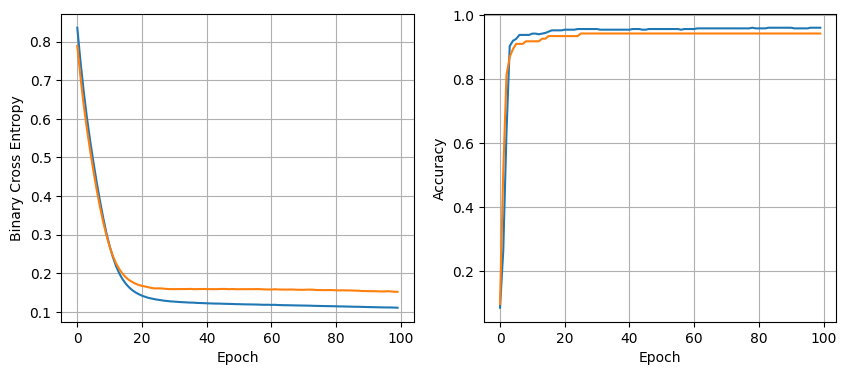

7/7 [==============================] - 0s 3ms/step - loss: 0.1423 - accuracy: 0.9400
32 nodes, dropout 0, learning rate 0.001, batch size 128


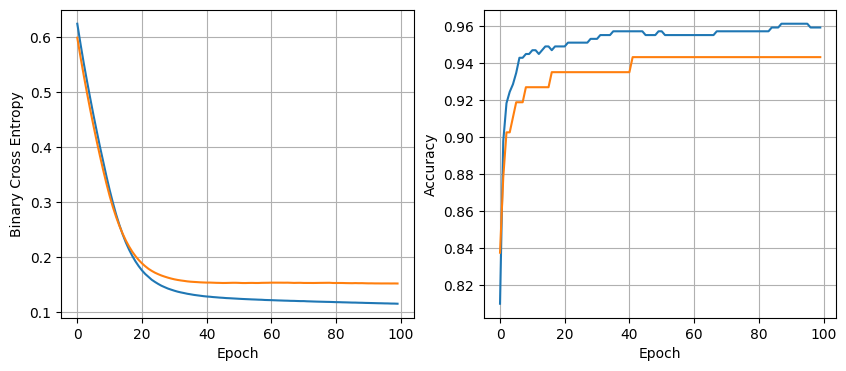

7/7 [==============================] - 0s 3ms/step - loss: 0.1411 - accuracy: 0.9400
32 nodes, dropout 0.2, learning rate 0.01, batch size 32


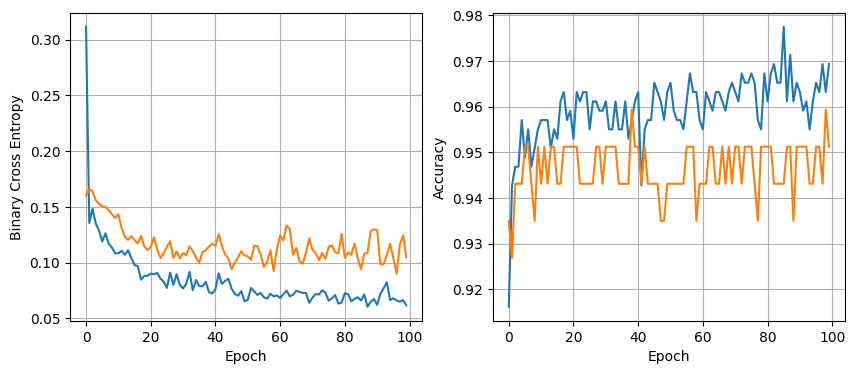

7/7 [==============================] - 0s 3ms/step - loss: 0.1534 - accuracy: 0.9400
32 nodes, dropout 0.2, learning rate 0.01, batch size 64


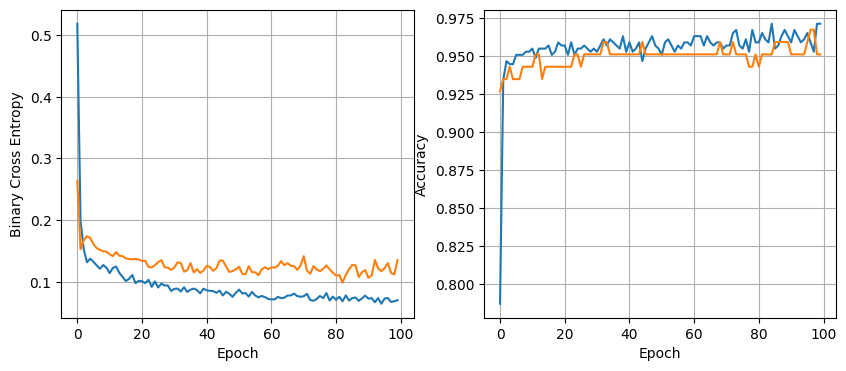

7/7 [==============================] - 0s 3ms/step - loss: 0.1190 - accuracy: 0.9500
32 nodes, dropout 0.2, learning rate 0.01, batch size 128


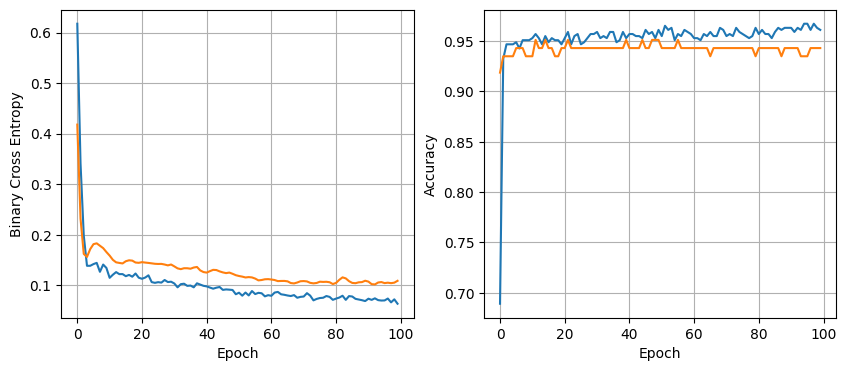

7/7 [==============================] - 0s 3ms/step - loss: 0.1184 - accuracy: 0.9500
32 nodes, dropout 0.2, learning rate 0.005, batch size 32


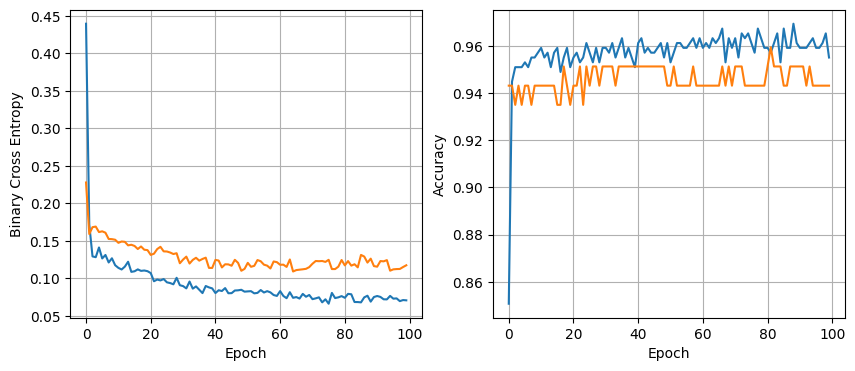

7/7 [==============================] - 0s 3ms/step - loss: 0.1289 - accuracy: 0.9500
32 nodes, dropout 0.2, learning rate 0.005, batch size 64


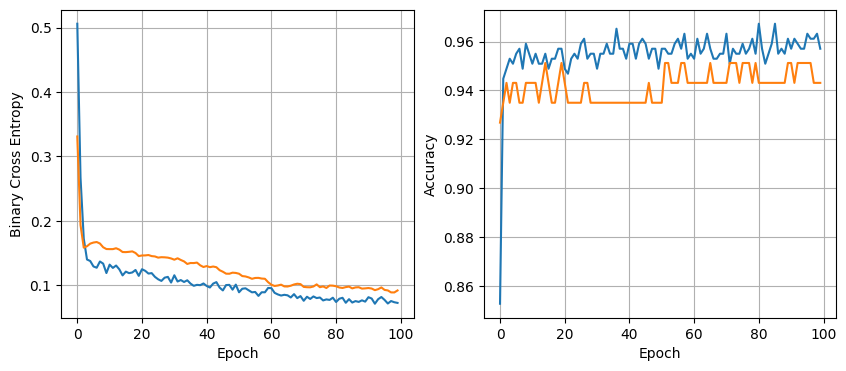

7/7 [==============================] - 0s 3ms/step - loss: 0.1199 - accuracy: 0.9450
32 nodes, dropout 0.2, learning rate 0.005, batch size 128


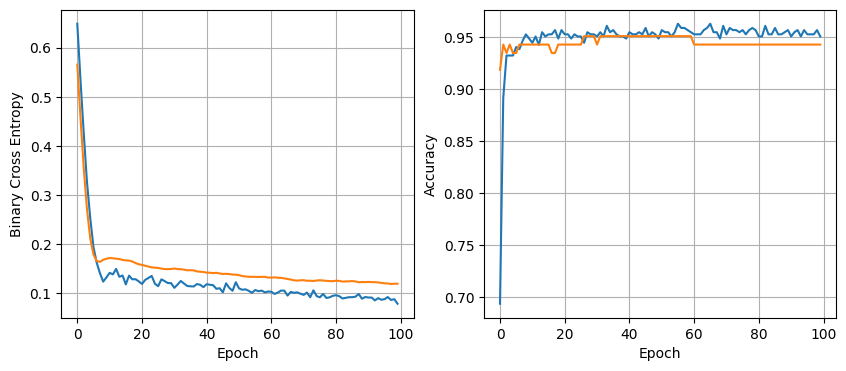

7/7 [==============================] - 0s 4ms/step - loss: 0.1257 - accuracy: 0.9400
32 nodes, dropout 0.2, learning rate 0.001, batch size 32


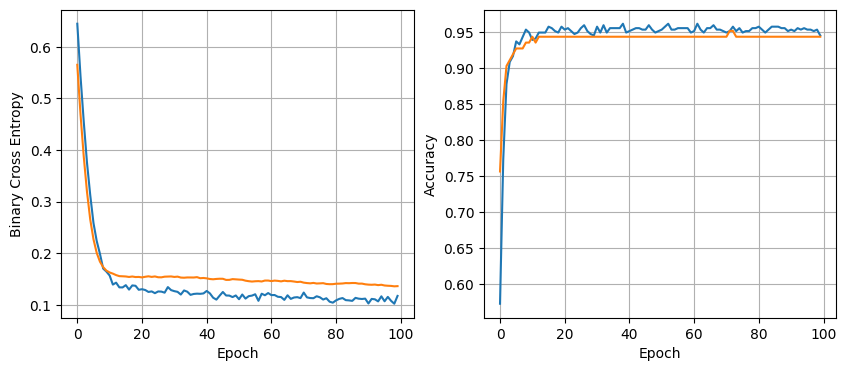

7/7 [==============================] - 0s 10ms/step - loss: 0.1373 - accuracy: 0.9400
32 nodes, dropout 0.2, learning rate 0.001, batch size 64


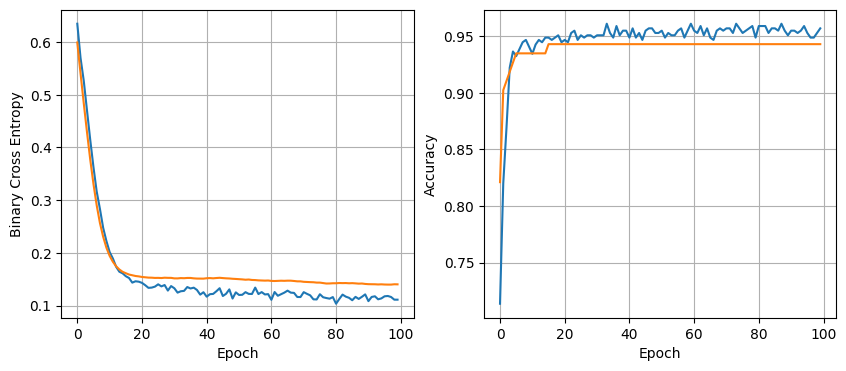

7/7 [==============================] - 0s 3ms/step - loss: 0.1426 - accuracy: 0.9400
32 nodes, dropout 0.2, learning rate 0.001, batch size 128


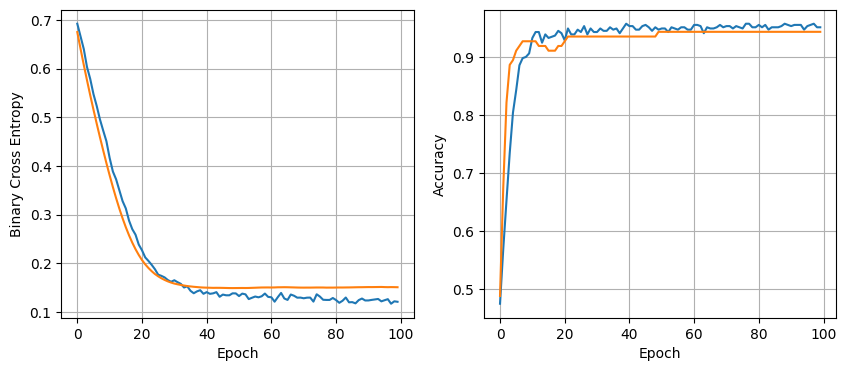

7/7 [==============================] - 0s 3ms/step - loss: 0.1393 - accuracy: 0.9350
64 nodes, dropout 0, learning rate 0.01, batch size 32


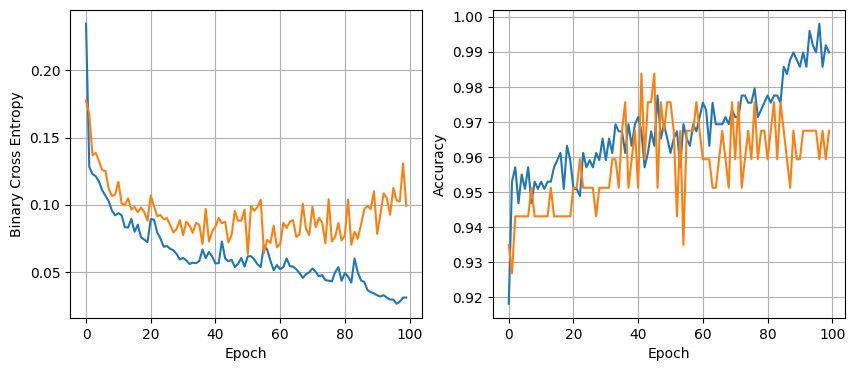

7/7 [==============================] - 0s 3ms/step - loss: 0.3011 - accuracy: 0.9400
64 nodes, dropout 0, learning rate 0.01, batch size 64


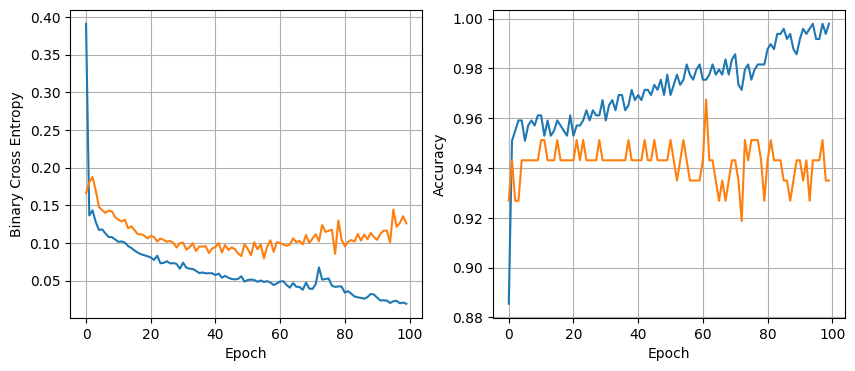

7/7 [==============================] - 0s 3ms/step - loss: 0.2383 - accuracy: 0.9350
64 nodes, dropout 0, learning rate 0.01, batch size 128


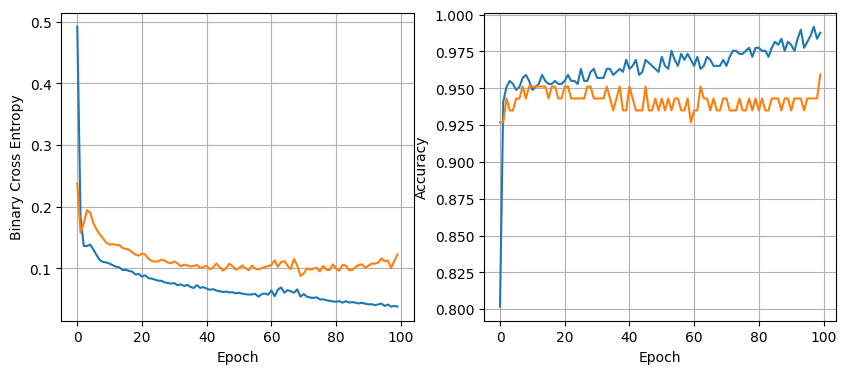

7/7 [==============================] - 0s 3ms/step - loss: 0.1420 - accuracy: 0.9350
64 nodes, dropout 0, learning rate 0.005, batch size 32


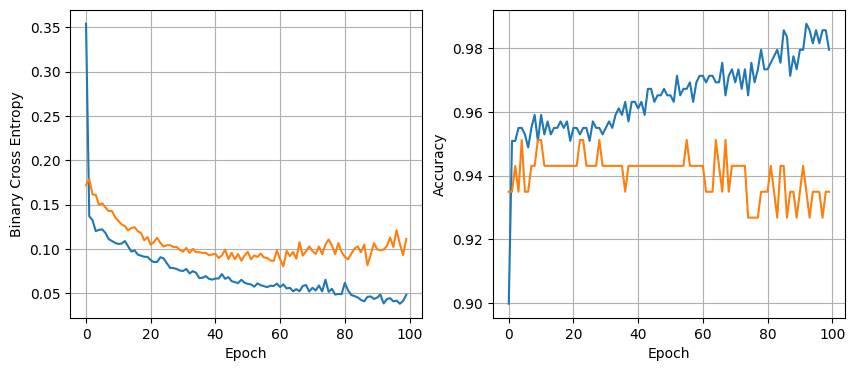

7/7 [==============================] - 0s 3ms/step - loss: 0.1813 - accuracy: 0.9450
64 nodes, dropout 0, learning rate 0.005, batch size 64


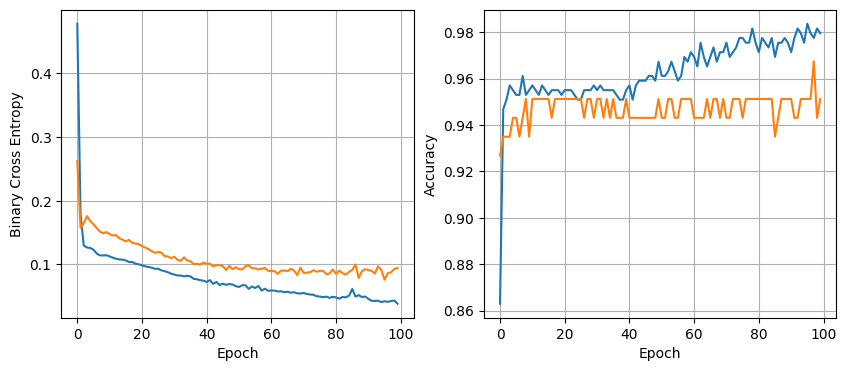

7/7 [==============================] - 0s 3ms/step - loss: 0.1510 - accuracy: 0.9450
64 nodes, dropout 0, learning rate 0.005, batch size 128


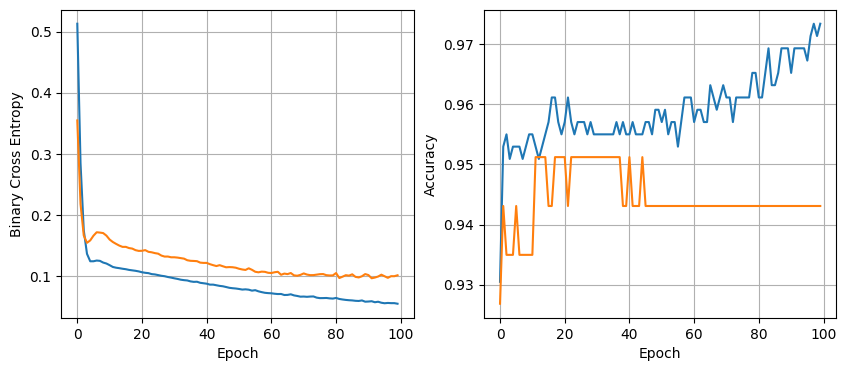

7/7 [==============================] - 0s 3ms/step - loss: 0.1099 - accuracy: 0.9450
64 nodes, dropout 0, learning rate 0.001, batch size 32


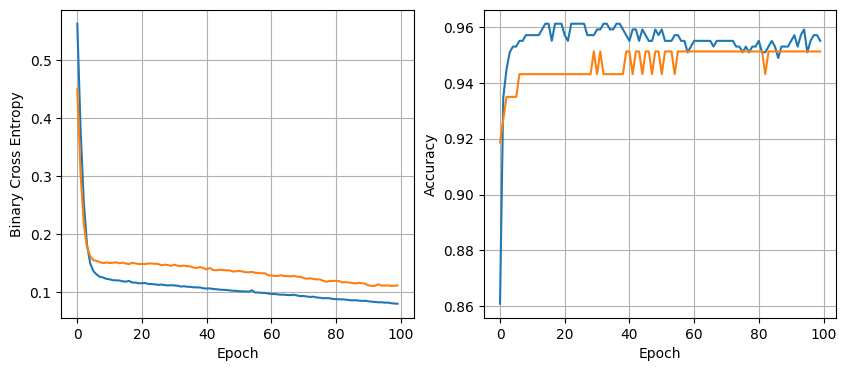

7/7 [==============================] - 0s 3ms/step - loss: 0.1200 - accuracy: 0.9450
64 nodes, dropout 0, learning rate 0.001, batch size 64


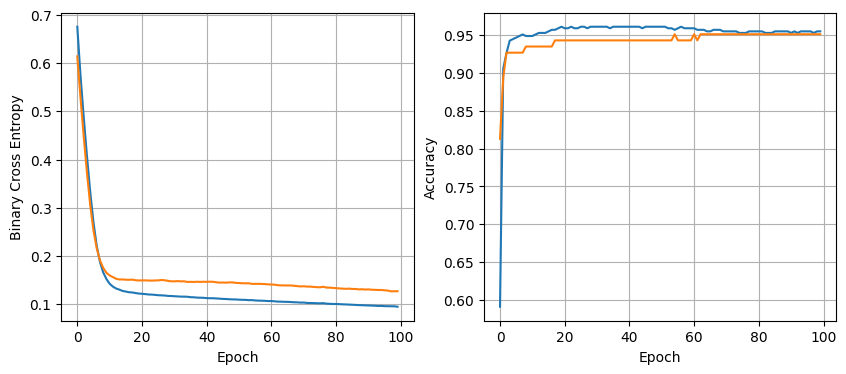

7/7 [==============================] - 0s 3ms/step - loss: 0.1328 - accuracy: 0.9400
64 nodes, dropout 0, learning rate 0.001, batch size 128


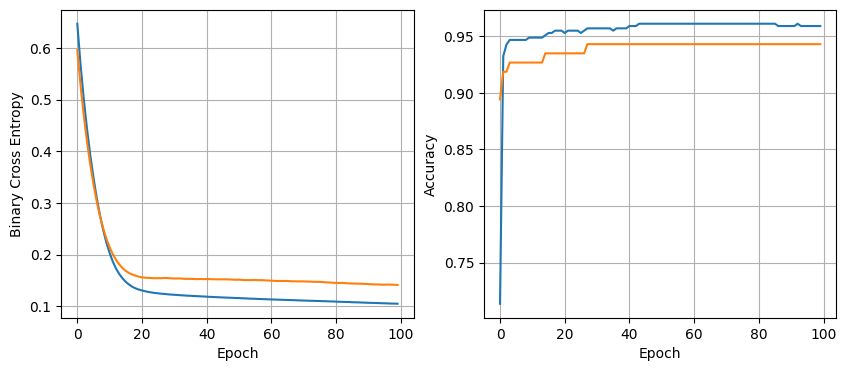

7/7 [==============================] - 0s 3ms/step - loss: 0.1367 - accuracy: 0.9450
64 nodes, dropout 0.2, learning rate 0.01, batch size 32


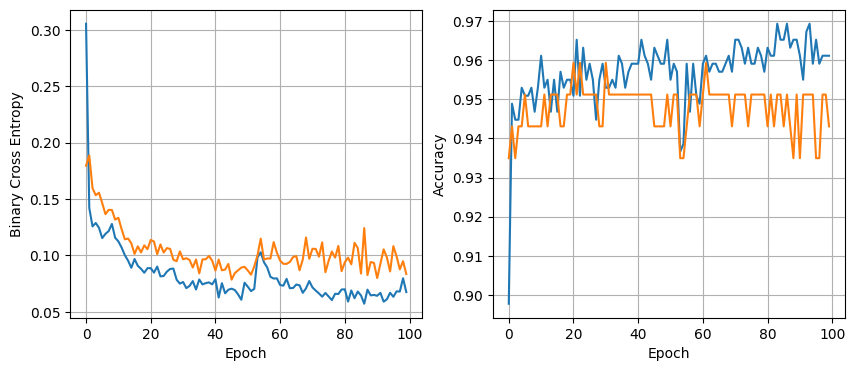

7/7 [==============================] - 0s 3ms/step - loss: 0.1590 - accuracy: 0.9500
64 nodes, dropout 0.2, learning rate 0.01, batch size 64


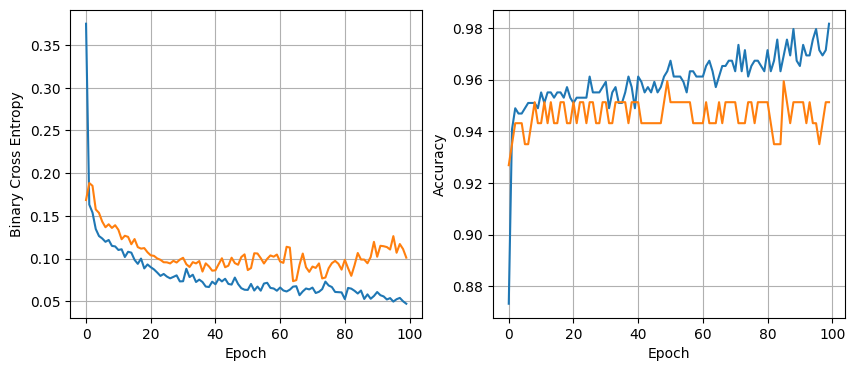

7/7 [==============================] - 0s 3ms/step - loss: 0.1802 - accuracy: 0.9350
64 nodes, dropout 0.2, learning rate 0.01, batch size 128


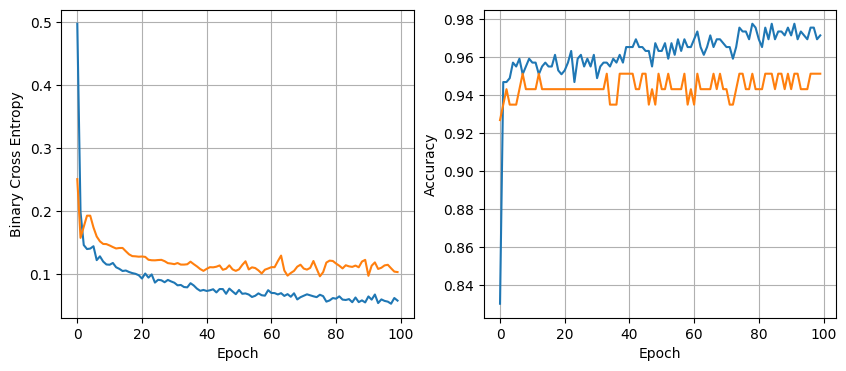

7/7 [==============================] - 0s 3ms/step - loss: 0.1434 - accuracy: 0.9400
64 nodes, dropout 0.2, learning rate 0.005, batch size 32


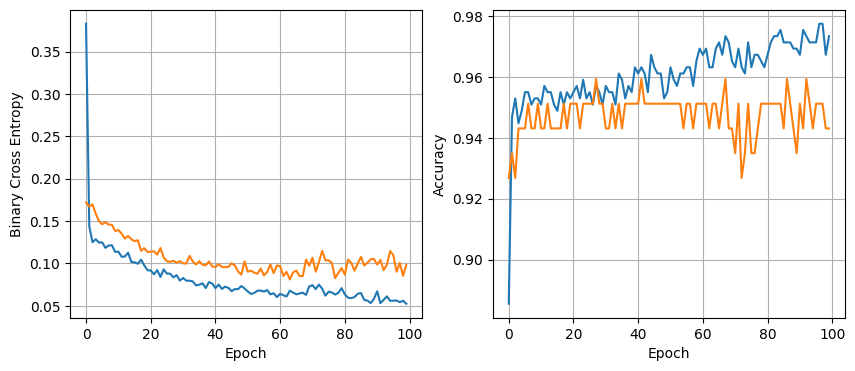

7/7 [==============================] - 0s 3ms/step - loss: 0.1540 - accuracy: 0.9350
64 nodes, dropout 0.2, learning rate 0.005, batch size 64


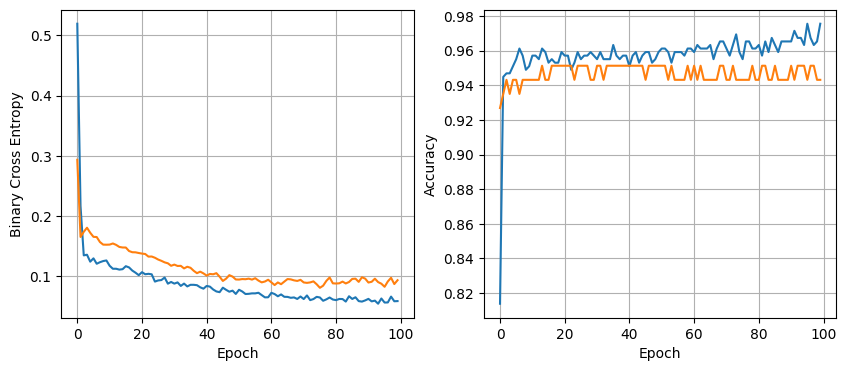

7/7 [==============================] - 0s 3ms/step - loss: 0.1459 - accuracy: 0.9350
64 nodes, dropout 0.2, learning rate 0.005, batch size 128


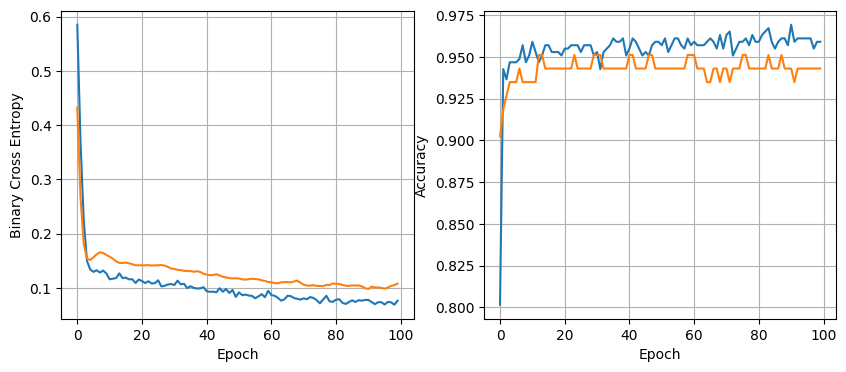

7/7 [==============================] - 0s 3ms/step - loss: 0.0988 - accuracy: 0.9550
64 nodes, dropout 0.2, learning rate 0.001, batch size 32


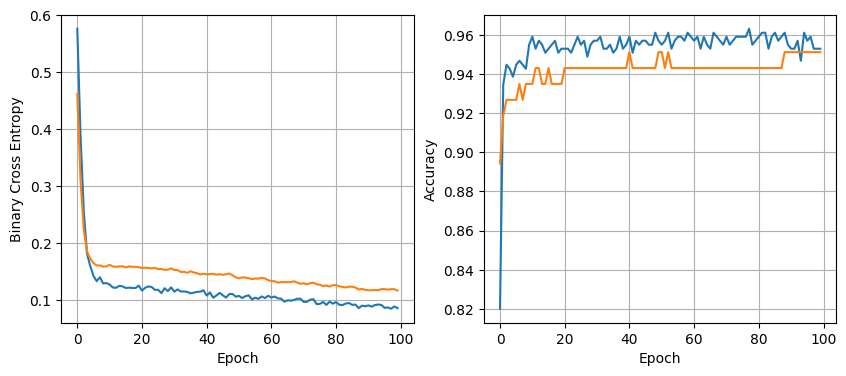

7/7 [==============================] - 0s 3ms/step - loss: 0.1300 - accuracy: 0.9400
64 nodes, dropout 0.2, learning rate 0.001, batch size 64


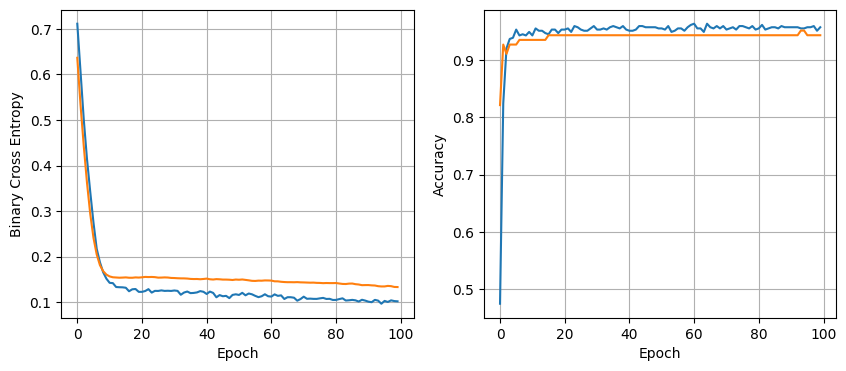

7/7 [==============================] - 0s 3ms/step - loss: 0.1358 - accuracy: 0.9400
64 nodes, dropout 0.2, learning rate 0.001, batch size 128


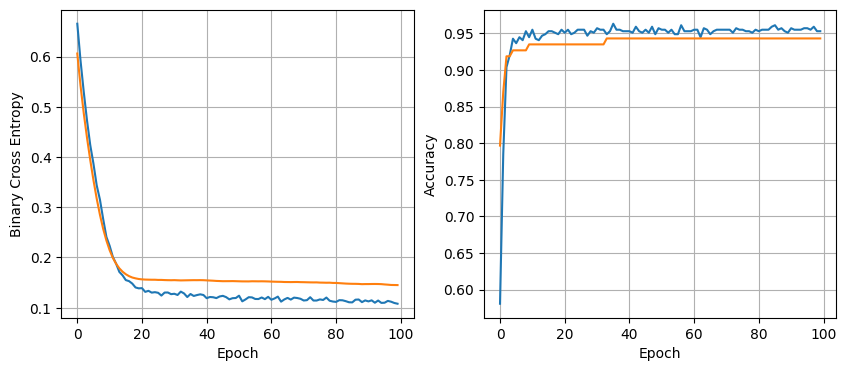

7/7 [==============================] - 0s 3ms/step - loss: 0.1384 - accuracy: 0.9350


In [17]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers


def train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
  # Build the neural network model
  nn_model = models.Sequential([
      layers.Dense(num_nodes, activation='relu', input_shape=(X_train.shape[1],)),
      layers.Dropout(dropout_prob),
      layers.Dense(num_nodes, activation='relu'),
      layers.Dropout(dropout_prob),
      layers.Dense(1, activation='sigmoid')
  ])

  # Compile the model
  nn_model.compile(optimizer=optimizers.Adam(lr), loss='binary_crossentropy', metrics=['accuracy'])

  # Train the model
  history = nn_model.fit(
    X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0
  )

  return nn_model, history


least_val_loss = float('inf')
least_loss_model = None
epochs=100
for num_nodes in [16, 32, 64]:
  for dropout_prob in[0, 0.2]:
    for lr in [0.01, 0.005, 0.001]:
      for batch_size in [32, 64, 128]:
        print(f"{num_nodes} nodes, dropout {dropout_prob}, learning rate {lr}, batch size {batch_size}")
        model, history = train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
        plot_history(history)
        val_loss = model.evaluate(X_valid, y_valid)[0]
        if val_loss < least_val_loss:
          least_val_loss = val_loss
          least_loss_model = model

In [18]:
y_pred = least_loss_model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int).reshape(-1,)

print(classification_report(y_test, y_pred))

7/7 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

         0.0       0.93      0.95      0.94       102
         1.0       0.95      0.93      0.94        98

    accuracy                           0.94       200
   macro avg       0.94      0.94      0.94       200
weighted avg       0.94      0.94      0.94       200



## Adversarial Machine Learning

Adversarial Machine Learning constitutes a subfield within machine learning concerned with comprehending and defending against adversarial attacks directed at machine learning models. Such attacks seek to exploit vulnerabilities in models by subtly perturbing input data to induce misclassification or degrade performance. Understanding and counteracting these attacks are imperative for ensuring the robustness and reliability of machine learning systems, particularly in security-sensitive contexts.

### Types of Adversarial Attacks

1. **Adversarial Examples**: Adversarial examples are meticulously crafted input samples that undergo subtle alterations imperceptible to humans but capable of inducing misclassification by machine learning models.

2. **Evasion Attacks**: Evasion attacks involve modifying input data to evade detection or classification by a machine learning model. Such attacks often exploit weaknesses in the model's decision boundary or feature representation.

3. **Poisoning Attacks**: Poisoning attacks entail manipulating the training data utilised to train a machine learning model. By introducing malicious samples into the training set, adversaries can compromise the model's integrity and trigger targeted misclassification during inference.

4. **Model Extraction Attacks**: Model extraction attacks are aimed at stealing the model or its parameters, often by repeatedly querying the model to learn about its structure and behaviour.

#### Measures Against Adversarial Attacks

- **Adversarial Training**: Adversarial training involves training models on a combination of clean and adversarially perturbed data. By exposing the model to adversarial examples during training, it learns to enhance its robustness against adversarial attacks.

- **Robust Optimisation**: Robust optimisation techniques aim to explicitly optimise models to withstand adversarial perturbations. This may involve modifying the loss function or incorporating regularisation terms that penalise sensitivity to minor input alterations.

- **Feature Transformation**: Feature transformation methods alter the input data or feature space to mitigate the impact of adversarial perturbations. Techniques such as input preprocessing, feature scaling, or dimensionality reduction can be employed.

- **Adversarial Detection**: Adversarial detection techniques aim to identify and flag adversarial examples or attacks during inference. This may involve monitoring model predictions for unexpected behaviours or employing anomaly detection algorithms to identify deviations from normal data distributions.

### Adversarial Example using FGSM

We generate adversarial examples using the Fast Gradient Sign Method (FGSM) with a small epsilon value.
FGSM perturbs the input data in the direction of the gradient of the loss function with respect to the input, aiming to maximise the model's prediction error.

In [19]:
# Convert NumPy arrays to TensorFlow tensors
X_test_tf = tf.convert_to_tensor(X_test)

epsilon = 0.1
with tf.GradientTape(persistent=True) as tape:
    tape.watch(X_test_tf)
    preds = least_loss_model(X_test_tf)
    # Reshape y_test to match the shape of preds
    y_test_reshaped = tf.reshape(y_test, (-1, 1))
    loss = tf.keras.losses.binary_crossentropy(y_test_reshaped, preds)

# Compute gradients
gradients = tape.gradient(loss, X_test_tf)

# Generate adversarial examples using FGSM
adversarial_examples = X_test_tf + epsilon * tf.sign(gradients)
adversarial_examples = tf.clip_by_value(adversarial_examples, 0, 1)

# Evaluate the model on adversarial examples
adv_test_loss, adv_test_acc = least_loss_model.evaluate(adversarial_examples, y_test)
print(f'Adversarial test accuracy: {adv_test_acc}')

7/7 [==============================] - 0s 3ms/step - loss: 0.7421 - accuracy: 0.5100
Adversarial test accuracy: 0.5099999904632568


 The adversarial test accuracy is 51%, which is far from close to the original test accuracy. This suggests that the model is susceptible to adversarial attacks, thus highlighting the need for improvements in model robustness and the adoption of strategies to counteract such vulnerabilities.